# Bagging

## 1. Introduction to Ensemble methods and Bagging 

<b>Bagging</b> is an <b>ensemble method</b> used in machine learning that can be applied to almost any <b>base learner</b> model. Generally speaking, it reduces the <b>variance</b> of the model while maintains the low <b>bias</b> of the model. You may see a lot of new terminologies here that seems overwhelming. No worries, we will go over these concepts one by one. So far all you need to know it that bagging helps us develop a more reliable model. In this code assignment we will be starting from scratch and build up these concepts with yout knowledge in EE16A EE16B and CS61B. 

Here is the outline of the assignment. If you are already familiar with some concept, you can feel free to skim through the part.  
1. Machine learning Basics recap <br>
    1.1 Linear regression <br>
    1.2 Polynomial regression <br>
    1.3 Overfitting<br>
2. Bias and Variance Recap<br>
3. Bootstrap <br>


### 1.1 EE16A ML Recap

In EE16A, we have learned about the basics of machine learning: identifying the problem of classification, estimation, prediction and clustering, mastering some linear algebra techniques to solve machine learning problem, eg. least square, optimizing a loss function. (vFor a quick 16A ML recap please go to https://inst.eecs.berkeley.edu/~ee16a/fa19/lecture/2019-11-12_11A.pdf ) Let's start with a set of problem that we are all familiar with in EE16A, "the line of best fit" problems. 

### ex.1 Linear regression 

In this simple exercise, we will be dealing with a toy example that helps you recap the setting of linear regression. You will also be able to bridge the gap between linear algebra and the larger setting of machine learning problem. Let's say that we are given a set of peerfectly linearly correlated data and we would like to figure out the exact formulation of their relations. We learned in the EE16A that we could formulate the problem as a least square problem and find its solution.

In [3]:
import random

In [5]:
""" Here we create a set of linearly correlated points: wx + b = y. Here w and b are unknown.
"""
w = 1.5
b = 30
xs, ys = [], []
for i in range(100):
    x = 100 * random.random() - 50
    xs.append(x)
    ys.append(w * x + b)

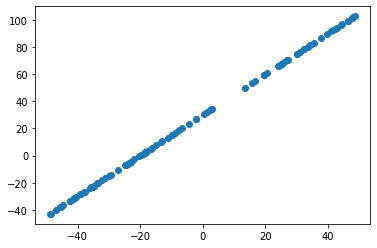

In [6]:
plt.scatter(xs,ys)

Here we know $X$ and $y$ . We can then formulate the problem as $$Ax = b$$  
$$A = \begin{bmatrix}
x_1 & 1 \\
x_2 & 1 \\
x_3 & 1 \\
\vdots  & \vdots \\
x_m & 1
\end{bmatrix}$$


$$b = \begin{bmatrix}
y_1 \\
y_2 \\
\vdots\\
y_m
\end{bmatrix}$$ 



<b>Q1:</b> Derive the algebric solution to the Least square problem.

In [7]:
""" Linear Algebra way of solving it comes by matrix calculation
"""
X_s = np.vstack([xs, np.ones(len(xs))]).T
w, b = np.linalg.inv(X_s.T @ X_s)@ X_s.T @ ys
w, b

(1.5000000000000004, 29.999999999999996)

<b>Q2:</b> Use Numpy's Least square method to code up the solution

In [8]:
""" Using Numpy's Least square solution
"""
X_s = np.vstack([xs, np.ones(len(xs))]).T
np.linalg.lstsq(X_s,ys, rcond = None) [0]

array([ 1.5, 30. ])

After these calculation we are able to obtain the predicted $Y$<sub>pred</sub> for any given $x$. By far you should be familiar with the pipeline of a basic machine learning problem.

### ex.2. Polynomial Regression

The previous example is set the stage for a larger set of regression problem called polynomial regression. Here we will give you some example to understand the set of regression problem better. Say our ground truth model is a second degree polynomial. If we used linear regression to model the problem, what problem will we have?

Write your observation here:

[]

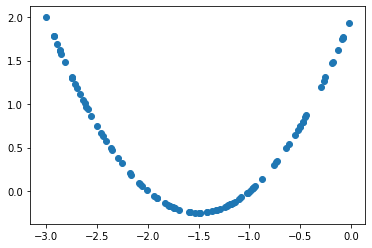

In [92]:
""" The ground truth data is modeled by a second degree polynomial. y = x**2 + 3x +2
"""
x_s, y_s = [], []
for i in range(100):
    x = 3 * random.random() - 3
    x_s.append(x)
    y_s.append(x**2 + 3*x +2)
x_s = np.array(x_s)
plt.scatter(x_s,y_s)
plt.plot()

First let us use linear method to model this polynomial data. Plot the line you get on the graph.

In [142]:
def plot_best_fit_poly(x_s, y_s,deg):
    coefficients = np.polyfit(x_s, y_s, deg=deg)
    poly = np.poly1d(coefficients)
    new_x = np.linspace(min(x_s), max(x_s))
    new_y = poly(new_x)
    plt.figure()
    plt.plot(x_s, y_s,"o", new_x, new_y, linewidth = 3)
    print('this is best fitted polynomial for degree' + str(deg))
    

In [47]:
X_s = np.vstack([x_s, np.ones(len(x_s))]).T
w, b =np.linalg.lstsq(X_s,y_s, rcond = None) [0]

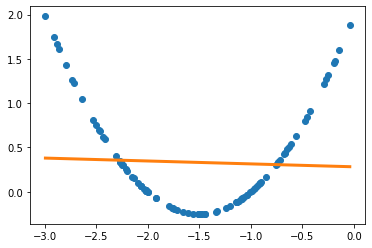

In [48]:
new_x = np.linspace(min(x_s), max(x_s))
new_y = w * new_x + b
plt.plot( x_s,y_s, 'o', new_x, new_y, linewidth = 3)

Numpy method polyfit will help you find the coefficient of polynomial given all the points on the curve. Please derive the most fitted the polynomial and plot it on top of the points.

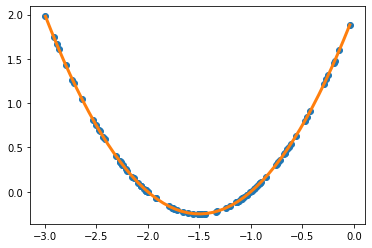

In [49]:
plot_best_fit_poly(x_s, y_s,2)

Now, try using polynial of degree 3,5,10 to model the second degree polynomial example. What do you find?

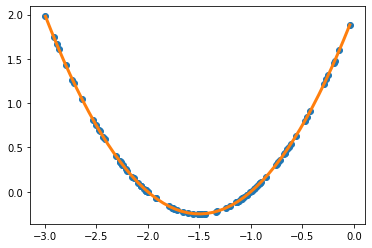

In [50]:
plot_best_fit_poly(x_s, y_s,3)

If we use degree 3,5,100, we will get the same result! Since we are ust putting all the terms over 2 degree to zero. Now it seems that there is an advantage to use higher degree polynomials, since it is more expressive and could model all sorts of functions. Is this the real case? Let's go into the next section and examine the case when we have imperfect data from real life.

### ex.3. Error term

In real life, it is almost impossible to get a set of perfect gauched data. There is a thousand ways to get things wrong. In this part, let jump out of the perfect examples and step our foot in the real life scenarios with error.

In [108]:
""" We manually plant some noises in the data, an error term that N: (0,0.5)
"""
errors = []
for i in range(100):
    errors.append(random.gauss(0,0.5))
y_with_error = np.add(y_s,errors)


this is best fitted polynomial for degree1
this is best fitted polynomial for degree4
this is best fitted polynomial for degree7
this is best fitted polynomial for degree10
this is best fitted polynomial for degree13
this is best fitted polynomial for degree16


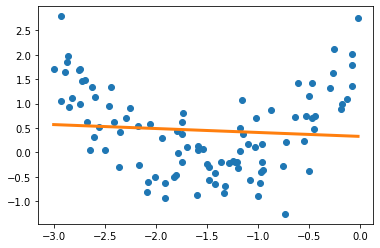

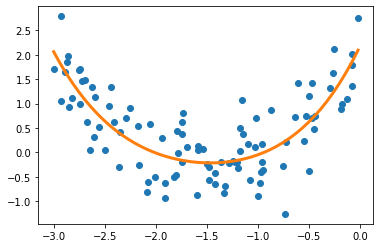

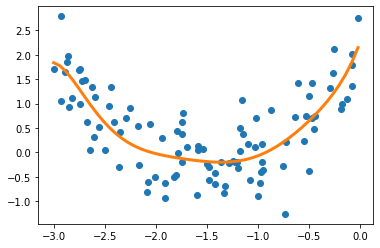

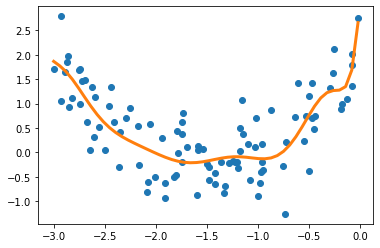

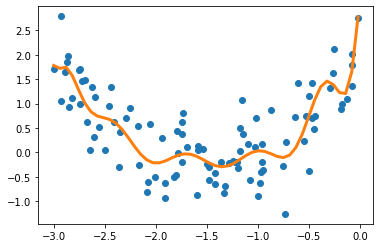

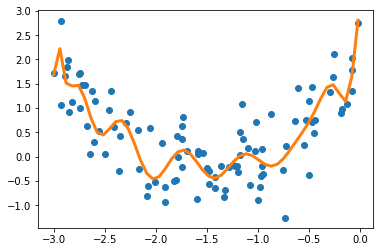

In [145]:
"""Compare the ground truth and the classifier we get with the noisy data"""
for i in range(1,17,3):
    plot_best_fit_poly(x_s, y_with_error,i)

As you can see, as we increase the polynomial term, the decision boundry becomes spiky. We relate this observation to the idea of overfitting: using a too complicated model to capture the nitty gritty of the data while not being able to generalize to other data. We often tie the idea of overfitting to high variance. If you select a bunch of samples from a population repeatedly whiling use an overfitting model, chances are that all the models you get each time will cater to the selected population and will vary to each other a lot. This is what we mean by high variance. In the next section, we will be exploring the bias variance trade off empirically.

## Variance and Bias: a brief recap

In Week 2, we have learned about bias-variance decomposition. We learned about varince bias decomposition which consists of three terms: bias of the method, variance of the method and irreducible error. Let's first do a basic exericse to recap the concept.

In [73]:
"""Ground Truth Function y = x + sin(1.5x), observed data y_obs = x + sin(1.5) + N(0,1)"""
x_obs, y_obs = [],[]
for i in range(100):
    x = random.random() * 4 - 2
    x_obs.append(x)
    y_obs.append(x+ np.sin(1.5*x)+random.gauss(0,0.5))

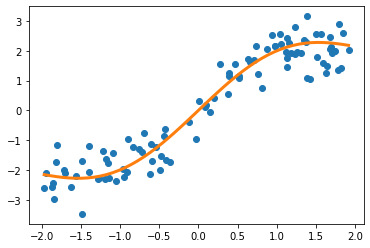

In [74]:
new_x = np.linspace(min(x_obs), max(x_obs))
new_y = new_x + np.sin(1.5 * new_x)
plt.plot(x_obs, y_obs,'o',new_x, new_y, linewidth = 3)

Let's get 20 separate observation dataset from the underlying function. Notice that we have a gaussian error term $N~(0,0.5)$ that will make each dataset different.

In [75]:
def gen_data(num):
    x_data,y_data = [],[]
    for i in range(num):
        x_obs, y_obs = [],[]
        for i in range(100):
            x = random.random() * 4 - 2
            x_obs.append(x)
            y_obs.append(x+ np.sin(1.5*x)+random.gauss(0,0.5))
        x_data.append(x_obs)
        y_data.append(y_obs)
    return x_data, y_data

In [76]:
x_bundle, y_bundle = gen_data(20)

In [77]:
""" Simulate the data with degree 1-4 polynomial and report the variance and bias of the result
"""
def bias_variance_demo(degree):
    coeffs = []
    for i in range(20):
        x_s = x_bundle[i]
        y_s = y_bundle[i]
        coefficients = np.polyfit(x_s, y_s, deg=degree)
        coeffs.append(coefficients)
        poly = np.poly1d(coefficients)
        new_x1 = np.linspace(min(x_s), max(x_s))
        new_y1 = poly(new_x1)
        #plt.figure()
        plt.plot(new_x1, new_y1, linewidth = 0.5)
    mean_coeff = np.mean((coeffs),axis = 0)
    mean_y = np.poly1d(mean_coeff)(new_x)
    plt.plot(new_x, mean_y, linewidth = 2)
    plt.plot(new_x, new_y, linewidth = 2)
    plt.title(str(degree) + "thE degree polynomial simulation of the function x+ sin(1.5*x)")
    plt.show()
    
        
    bias = abs(sum(mean_y - new_y))
    y_s = []
    for i in range(20):
        coeff = coeffs[i]
        poly = np.poly1d(coeff)
        y_s.append(poly(new_x))    
    variance = np.var(y_s)
    print("bias is " + str(bias))
    print("variance is " + str(variance))
    print("bias**2 + variance = " + str(bias**2+variance))


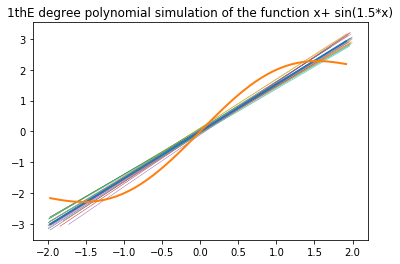

bias is 0.5801291426167103
variance is 3.0496649788797767
bias**2 + variance = 3.3862148009929762


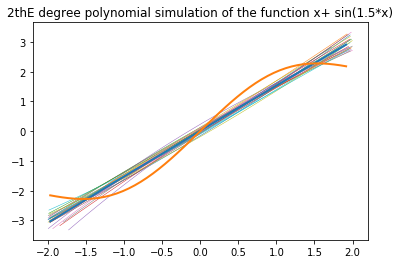

bias is 0.5859386704477334
variance is 3.0769759162242036
bias**2 + variance = 3.420300041750261


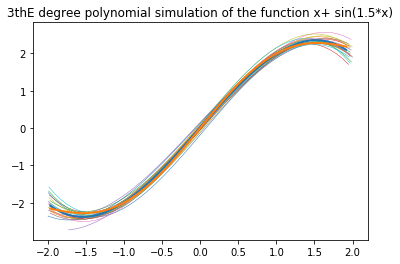

bias is 0.09079426051724593
variance is 3.274479993843762
bias**2 + variance = 3.2827235915866355


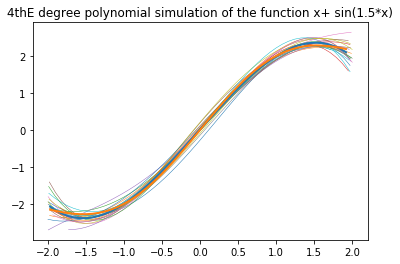

bias is 0.13269578416656808
variance is 3.2871676937484664
bias**2 + variance = 3.304775864884047


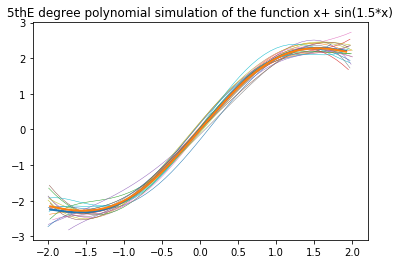

bias is 0.22248487951118273
variance is 3.3170743142113
bias**2 + variance = 3.3665738358224053


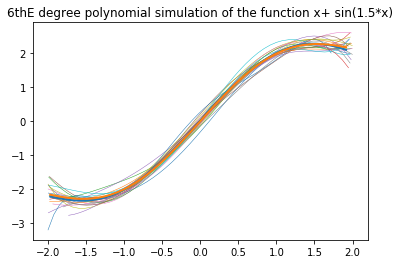

bias is 0.42785644313717786
variance is 3.297234100956737
bias**2 + variance = 3.4802952368907345


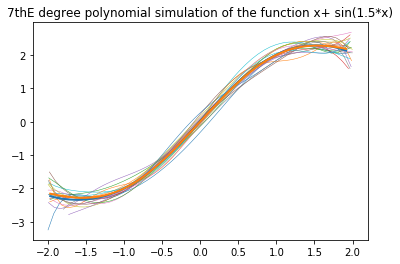

bias is 0.5071086964175353
variance is 3.310698453459645
bias**2 + variance = 3.567857683441937


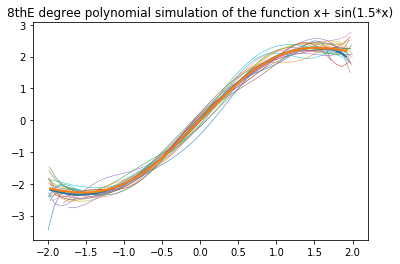

bias is 0.6147941735595658
variance is 3.3012417448985527
bias**2 + variance = 3.679213620741342


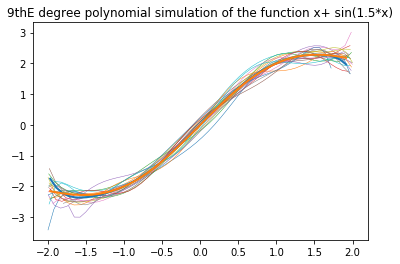

bias is 0.010638834883151871
variance is 3.3144096867651935
bias**2 + variance = 3.3145228715728643


In [80]:
for deg in range(1,10):
    bias_variance_demo(deg)

One would observe that as the degree of polynomial increases the bias is steadily decreasing yet the variance is increasing. Why is that? You should already encounter the concept of bias variance decomposition in previous weeks and in notes.

### Bagging: An experiment

Indeed, different learners and model classes have different tradeoffs.  

– large bias/small variance: few features, highly regularized, highly pruned decision trees, large-k kNN etc  
– small bias/high variance: many features, less regularization, small-k k-NN etc

A natural questions arises as well deal with models with low bias and high variance. How can we prevent them from overfitting? From the previous part, we find that the mean model is much mroe smoothened out. From there, one natural intuition arises: averaging out the result of the model. In the previous example, we had 20 datasets generated from the underlying ground truth function. In real life, we only have one set of dataset and we do not have the gournd truth function. How could we generate all the datasets? We used the idea of bootstrap.

#### Polynomial example

### Bagging Theory

<img src="https://miro.medium.com/max/700/1*_pfQ7Xf-BAwfQXtaBbNTEg.png">

From the previous example, we can see that bagging can somehow avoid overfitting and get some pretty good result. From a theoretic pespective how does it really work?

When we do bagging, we first bootstrap M different samples without replacement from the population. Since we are sampling without replacement, then these samples are independent of each other. Thus we name them as $Y_1, Y_2, ..., Y_m$ independent random variables each with mean $\mu$ and variance $\sigma ^2$. As we average them, we are basically taking the expectation of the following terms which you will see is still $\mu$ $$ \frac{1}{M}  \sum_{i=1}^{M} Y_i = \frac{1}{M} \times {M \mu} = \mu $$ Therefore after all these mumble jumbles we still get that good low bias. As for variance, let's do our calculation: $$ var(\frac{1}{M}\sum_{i=1}^{M} Y_i) = \frac{1}{M^2} \times var(\sum_{i=1}^{M} Y_i) = \frac{1}{M^2} \times \sigma^2 \times M  = \frac{\sigma^2} {M} $$ As we can see the variance goes down linearly as M increases. This is the exact reason why we are able to get a better result in the end.

Now, observe the following results of applying bagging to two exising dataset:

#### Iris Example

In [5]:
from mlxtend.evaluate import bias_variance_decomp
from sklearn.tree import DecisionTreeClassifier
from mlxtend.data import iris_data
from sklearn.model_selection import train_test_split


X, y = iris_data()
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=123,
                                                    shuffle=True,
                                                    stratify=y)



tree = DecisionTreeClassifier(random_state=123)

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        tree, X_train, y_train, X_test, y_test, 
        loss='0-1_loss',
        random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss: 0.062
Average bias: 0.022
Average variance: 0.040


In [4]:
from mlxtend.evaluate import bias_variance_decomp

In [6]:
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier(random_state=123)
bag = BaggingClassifier(base_estimator=tree,
                        n_estimators=100,
                        random_state=123)

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        bag, X_train, y_train, X_test, y_test, 
        loss='0-1_loss',
        random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss: 0.048
Average bias: 0.022
Average variance: 0.026


#### Boston housing dat example

In [8]:
from mlxtend.evaluate import bias_variance_decomp
from sklearn.tree import DecisionTreeRegressor
from mlxtend.data import boston_housing_data
from sklearn.model_selection import train_test_split

X, y = boston_housing_data()
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=123,
                                                    shuffle=True)



tree = DecisionTreeRegressor(random_state=123)

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        tree, X_train, y_train, X_test, y_test, 
        loss='mse',
        random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss: 31.727
Average bias: 14.085
Average variance: 17.642


In [9]:
from sklearn.ensemble import BaggingRegressor

tree = DecisionTreeRegressor(random_state=123)
bag = BaggingRegressor(base_estimator=tree,
                       n_estimators=100,
                       random_state=123)

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        bag, X_train, y_train, X_test, y_test, 
        loss='mse',
        random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss: 18.600
Average bias: 15.445
Average variance: 3.155


In [1]:
import sklearn.svm as svm
import sklearn.datasets as dt
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
import pandas as pd

### Extracting Feature from the original csv File

In [3]:
df = pd.read_csv('Admission_Predict.csv', index_col='Serial No.')
df = df.dropna()

In [6]:
X = df.drop('Chance of Admit ', axis=1)

In [12]:
y = df['Chance of Admit ']

In [27]:
y_val = y.values
y_val[y_val>0.5] = 1
y_val[y_val != 1] = 0

### Naive Decision Tree

Train decision tree by importing function from sklearn

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_val, random_state = None)

In [33]:
from sklearn import tree

model = tree.DecisionTreeClassifier()

In [35]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [36]:
y_predict = model.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.87

In [41]:
tree.export_graphviz(model, out_file='tree.dot', feature_names=X.columns)

Visualize the decision tree